In [1]:
import tensorflow as tf
import os
from keras_preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


Preprocessing the Dataset

In [6]:
import zipfile

local_zip = '/content/Datasetmedicall.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [7]:
import os

base_dir = 'Machine Learning\Dataset Bangkit\Train'

Alergi_dir = os.path.join(base_dir, 'Alergi-Train')
Antibiotik_dir = os.path.join(base_dir, 'Antibiotik-Train')
Maag_dir = os.path.join(base_dir, 'Maag-Train')
Paracetamol_dir = os.path.join(base_dir, 'Paracetamol-Train')
Vitamin_dir = os.path.join(base_dir, 'Vitamin-Train')

print('total training Obat Alergi images:', len(os.listdir(Alergi_dir)))
print('total training Obat Antibiotik images:', len(os.listdir(Antibiotik_dir)))
print('total training Obat Maag images:', len(os.listdir(Maag_dir)))
print('total training Obat Paracetamol images:', len(os.listdir(Paracetamol_dir)))
print('total training Vitamin images:', len(os.listdir(Vitamin_dir)))

Alergi_files = os.listdir(Alergi_dir)
print(Alergi_files[:10])

Antibiotik_files = os.listdir(Antibiotik_dir)
print(Antibiotik_files[:10])

Maag_files = os.listdir(Maag_dir)
print(Maag_files[:10])

Paracetamol_files = os.listdir(Paracetamol_dir)
print(Paracetamol_files[:10])

Vitamin_files = os.listdir(Vitamin_dir)
print(Vitamin_files[:10])

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Machine Learning\\Dataset Bangkit\\Train\\Alergi-Train'

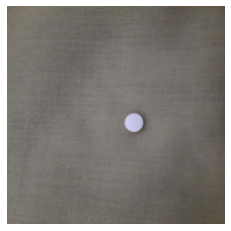

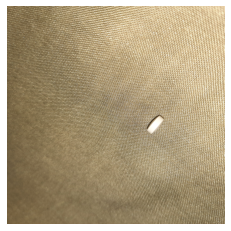

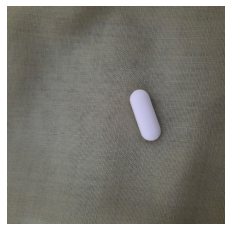

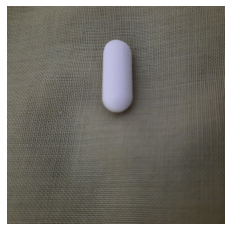

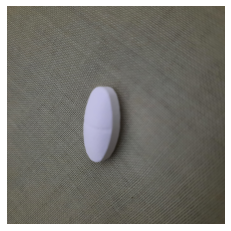

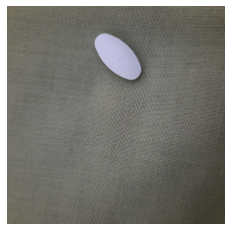

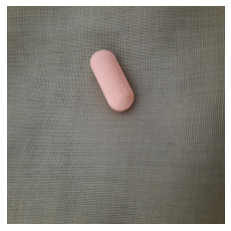

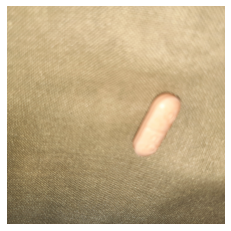

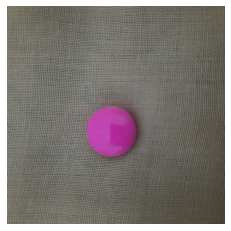

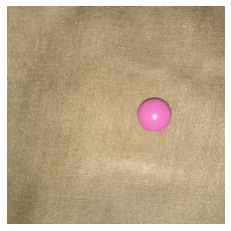

In [8]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

pic_index = 2

next_Alergi = [os.path.join(Alergi_dir, fname) 
                for fname in Alergi_files[pic_index-2:pic_index]]
next_Antibiotik = [os.path.join(Antibiotik_dir, fname) 
                for fname in Antibiotik_files[pic_index-2:pic_index]]
next_Maag = [os.path.join(Maag_dir, fname) 
                for fname in Maag_files[pic_index-2:pic_index]]
next_Paracetamol = [os.path.join(Paracetamol_dir, fname) 
                for fname in Paracetamol_files[pic_index-2:pic_index]]
next_Vitamin = [os.path.join(Vitamin_dir, fname) 
                for fname in Vitamin_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_Alergi+next_Antibiotik+next_Maag+next_Paracetamol+next_Vitamin):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

TensorFlow Model Sequential

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

TensorFlow Training Parameter

In [16]:
model.compile(loss = 'categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
TRAINING_DIR = "/content/Train" #GANTI
training_datagen = ImageDataGenerator(
      rescale = 1./255,
	    rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/content/Test"  #GANTI
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=25
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(150,150),
	class_mode='categorical',
  batch_size=25
)

Found 86 images belonging to 5 classes.
Found 25 images belonging to 5 classes.


Train Model

In [20]:
history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=5)

Epoch 1/25
20/20 [==============================] - 27s 472ms/step - loss: 1.7060 - accuracy: 0.2442 - val_loss: 1.6217 - val_accuracy: 0.2000


Result Plot

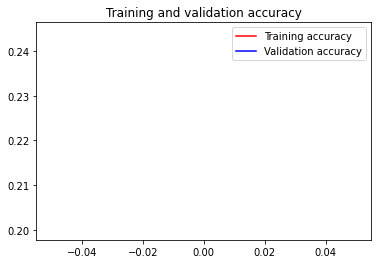

<Figure size 432x288 with 0 Axes>

In [21]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

Model Predict

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)